## Bike Sharing Assignment

#### Problem Statement:

A US bike-sharing provider BoomBikes has a daily dataset on the rental bikes based on various environmental and seasonal settings. It wishes to use this data to understand the factors affecting the demand for these shared bikes in the American market and come up with a mindful business plan to able to accelerate its revenue as soon as the ongoing lockdown due to corona pandemic comes to end.

Essentially, the company wants to know —


- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands.


#### Solution can be obtained using below steps

1. Exploratory Data Analysis:
    - Reason: We can get inferences when we perform EDA on the dataset
    - Steps: Data Sourcing, Profiling, Cleansing, Handling Outliers, Univariate, bivariate and multivariate data analysis
2. Linear Regression model:
    - Reason: To predict the target variables using the available predictor variable. Also we can test the inferences made.
    - Steps: Data Preperation, Model Building, Residual Analysis, Making Predictions and Model Evaluation
    
- We can also compare and validate if there is a match between inferences made in EDA and the linear regreassion model fit equation (variables and their coefficients). 

### Exploratory Data Analysis

#### Importing Libraries and Data Sourcing

Let us first import NumPy and Pandas and read the housing dataset

In [1]:
# Importing warnings and libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bike = pd.read_csv("day.csv")

#### Data Profiling

In [3]:
# Check the head of the dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the bike dataframe

In [4]:
bike.shape

(730, 16)

In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Data Cleaning

In [7]:
# 1. Improve the data quality by fixing the rows – address incorrect, summary and extraneous rows if required.
# 2. Fix the columns – rename, delete, add, split, merge and align  columns if required.
# 3. Deal with the missing values in the data sources. Impute or delete the missing data if required.
# 4. Standardize the data values, fix invalid values, identify and decide on outliers,and filter data if required.

##### 1. Fix invalid rows:

In [8]:
# There are no header or footer rows,no total or subtotal rows, no column numbers, indicators, blank rows and page no rows.
## So fixing of invalid rows is not required.

##### 2. Fix invalid columns:

In [9]:
# rename, delete, add, split, merge and align columns if required.

In [10]:
# Here we have few columns that are not useful for analysis, hence dropping those.
    # instant: column is record index and not a predictor variable.
    # dteday: Date not required as we already have mnth, year and weekday. daily trend or time series is not our goal we can drop date.
    # casual and registered: These values are indirectly our target variable. cnt = casual + registered.

In [11]:
# Droping instant column
bike.drop(['instant'], axis = 1, inplace = True)
# Dropping dteday column
bike.drop(['dteday'], axis = 1, inplace = True)
# Dropping casual and registered columns
bike.drop(['casual'], axis = 1, inplace = True)
bike.drop(['registered'], axis = 1, inplace = True)

##### 3. Fix the missing values in rows

In [12]:
# There are no nulls (from data proling section)

##### 4. Handling Outliers

In [13]:
# Detect and fix the outliers to eliminate bias in data analysis.

In [14]:
# Check the columns and the unique values in them.
bike.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [15]:
# From above list we can see that few columns have less unique values while others have high uniques.
# This is because the columns with less uniques are categorical in nature (in most of the cases, also in this case)
# Print the values and their proportion in these categorical variables
print(bike.season.value_counts(normalize=True))
print(bike.yr.value_counts(normalize=True))
print(bike.mnth.value_counts(normalize=True))
print(bike.holiday.value_counts(normalize=True))
print(bike.weekday.value_counts(normalize=True))
print(bike.workingday.value_counts(normalize=True))
print(bike.weathersit.value_counts(normalize=True))

3    0.257534
2    0.252055
1    0.246575
4    0.243836
Name: season, dtype: float64
0    0.5
1    0.5
Name: yr, dtype: float64
1     0.084932
3     0.084932
5     0.084932
7     0.084932
8     0.084932
10    0.084932
12    0.084932
4     0.082192
6     0.082192
9     0.082192
11    0.082192
2     0.076712
Name: mnth, dtype: float64
0    0.971233
1    0.028767
Name: holiday, dtype: float64
1    0.143836
2    0.143836
3    0.142466
4    0.142466
5    0.142466
6    0.142466
0    0.142466
Name: weekday, dtype: float64
1    0.690411
0    0.309589
Name: workingday, dtype: float64
1    0.634247
2    0.336986
3    0.028767
Name: weathersit, dtype: float64


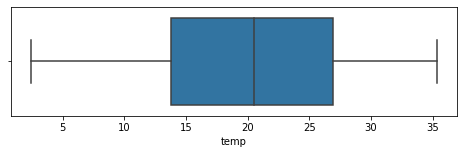

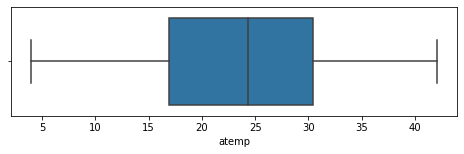

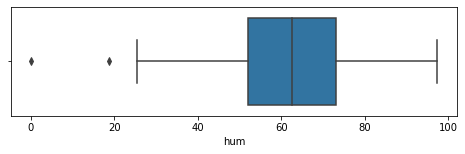

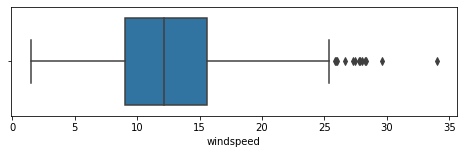

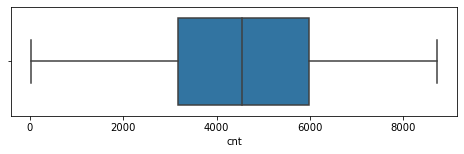

In [16]:
# For quantitative variables we can use box plots to check outliers
plt.figure(figsize=[8,2]),sns.boxplot((bike.temp));plt.show()
plt.figure(figsize=[8,2]),sns.boxplot((bike.atemp));plt.show()
plt.figure(figsize=[8,2]),sns.boxplot((bike.hum));plt.show()
plt.figure(figsize=[8,2]),sns.boxplot((bike.windspeed));plt.show()
plt.figure(figsize=[8,2]),sns.boxplot((bike.cnt));plt.show()

In [17]:
# From above plots we can see that few values of humidity box plot are below the lower hinge.
# lets check what %le data has sudden jumps in humidity and what can be dropped.
bike.hum.quantile([0.0001, 0.001, 0.002, 0.003, 0.005, 0.01])

0.0001     1.369915
0.0010    13.699149
0.0020    21.825950
0.0030    25.821854
0.0050    28.497072
0.0100    31.209593
Name: hum, dtype: float64

In [18]:
# there is sudden jump in values of humidity from 0.001 to 0.002, and after 0.002 values are smoothly increasing.
# lets check the rows with least humidity values
bike[bike.hum<bike.hum.quantile([0.002][0])]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
49,1,0,2,0,1,1,1,16.365847,19.5702,18.7917,34.000021,1635
68,1,0,3,0,6,0,3,15.952731,19.2834,0.0000,17.545759,623


In [19]:
# there are 2 rows that have very less hum values and 1 row has 0 which is impossible
# lets delete these 2 rows to avoid bias
bike = bike[bike.hum>bike.hum.quantile([0.002][0])]

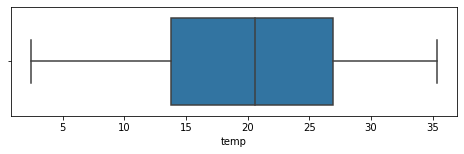

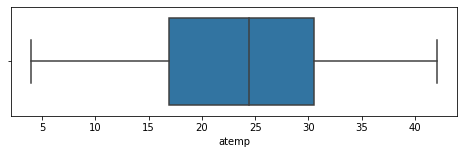

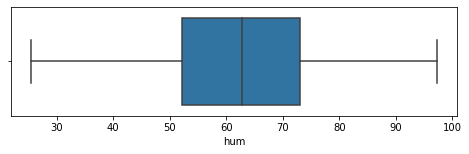

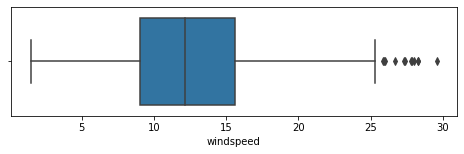

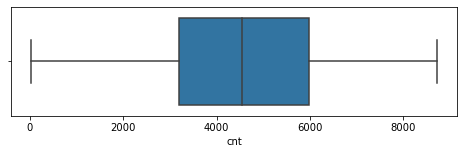

In [20]:
# Lets review the plots again:
plt.figure(figsize=[8,2]),sns.boxplot((bike.temp));plt.show()
plt.figure(figsize=[8,2]),sns.boxplot((bike.atemp));plt.show()
plt.figure(figsize=[8,2]),sns.boxplot((bike.hum));plt.show()
plt.figure(figsize=[8,2]),sns.boxplot((bike.windspeed));plt.show()
plt.figure(figsize=[8,2]),sns.boxplot((bike.cnt));plt.show()

In [21]:
# now in windspeed we have values above higher hinge of box plot
bike.windspeed.quantile([0.8, 0.9, 0.95,0.96,0.97,0.98 , 0.99, 0.995, 0.999, 1])

0.800    16.609193
0.900    19.804443
0.950    22.985342
0.960    23.291966
0.970    23.966082
0.980    25.121693
0.990    27.123258
0.995    27.894367
0.999    28.645222
1.000    29.584721
Name: windspeed, dtype: float64

In [22]:
# Here the jump in values is smooth and hence we can ignore these values

#### Standardize the data values

In [23]:
# In the outliers section we saw that categorical variables have values that are encoded with numbers.
# Lets replace these coded values with the original values.
# Inferences made on coded values will not be clear so with real values we can make inferences readable and more understandable.

In [24]:
bike.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
bike.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)
bike.yr.replace({0: '2018',1: '2019'},inplace = True)
bike.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',7: 'jul',8: 'aug',9: 'sep',10: 'oct',11: 'nov',12: 'dec'},inplace = True)
bike.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'},inplace = True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [25]:
100*bike.isnull().sum()/bike.shape[0]

season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
cnt           0.0
dtype: float64

#### Univariate Analysis
    1. Categorical unordered variables abalysis - holiday, workingday
    2. Categorical ordered univariate analysis - season, yr, mnth, weekday, wethersit
    3. Numercal Univariate Analysis - temp, atemp, hum, windspeed, cnt

##### 1. Categorical unordered variables analysis

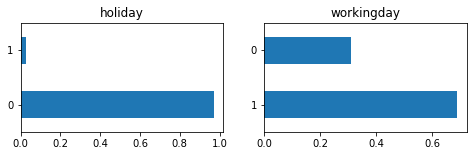

In [26]:
plt.figure(figsize=[8,2])
plt.subplot(1,2,1);bike['holiday'].value_counts(normalize=True).plot.barh(title = 'holiday');
plt.subplot(1,2,2);bike['workingday'].value_counts(normalize=True).plot.barh(title = 'workingday');
plt.show()

##### Inferences:
    - 1. Most of the days falls under no holiday 
    - 2. Weekdays are more compared with weekends and holidays count
        - This is normal and hence can't extract very useful insights from this

##### 2. Categorical ordered univariate analysis

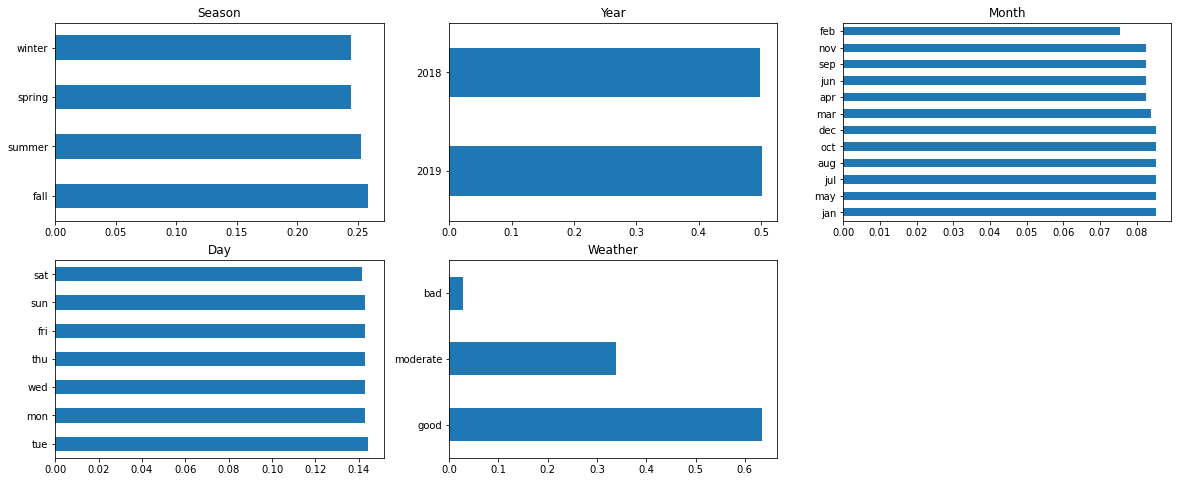

In [27]:
plt.figure(figsize=[20,8])
plt.subplot(2,3,1);bike['season'].value_counts(normalize=True).plot.barh(title = 'Season');
plt.subplot(2,3,2);bike['yr'].value_counts(normalize=True).plot.barh(title = 'Year');
plt.subplot(2,3,3);bike['mnth'].value_counts(normalize=True).plot.barh(title = 'Month');
plt.subplot(2,3,4);bike['weekday'].value_counts(normalize=True).plot.barh(title = 'Day');
plt.subplot(2,3,5);bike['weathersit'].value_counts(normalize=True).plot.barh(title = 'Weather');
plt.show()

##### Inferences:
    - 1. Most of the data values are distributed evenly in year, month, weeday, season columns
    - 2. But in weather column we can see that with increase in severity we have decreas in the numbers

##### 3. Numercal Univariate Analysis

In [28]:
# This is already analysed in outliers section

#### Bivariate Analysis
    
    1. Numeric-Numeric Analysis - temp, atemp, hum, windspeed, cnt
    2. Numerical-Categorical - temp, atemp, hum, windspeed, cnt, holiday, workingday, season, yr, mnth, weekday, weathersit
    3. Categorical-Categorical Analysis - holiday, workingday, season, yr, mnth, weekday, weathersit

##### 1. Numeric-Numeric Analysis

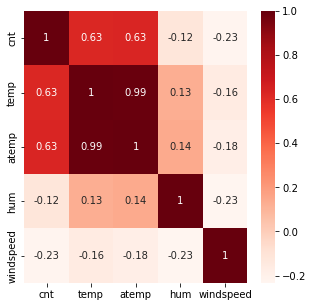

In [29]:
#plot a heat map to analyze which measures are correlated
plt.figure(figsize=[5,5])
sns.heatmap(bike[['cnt','temp','atemp','hum','windspeed']].corr(), annot=True, cmap='Reds')
plt.show()

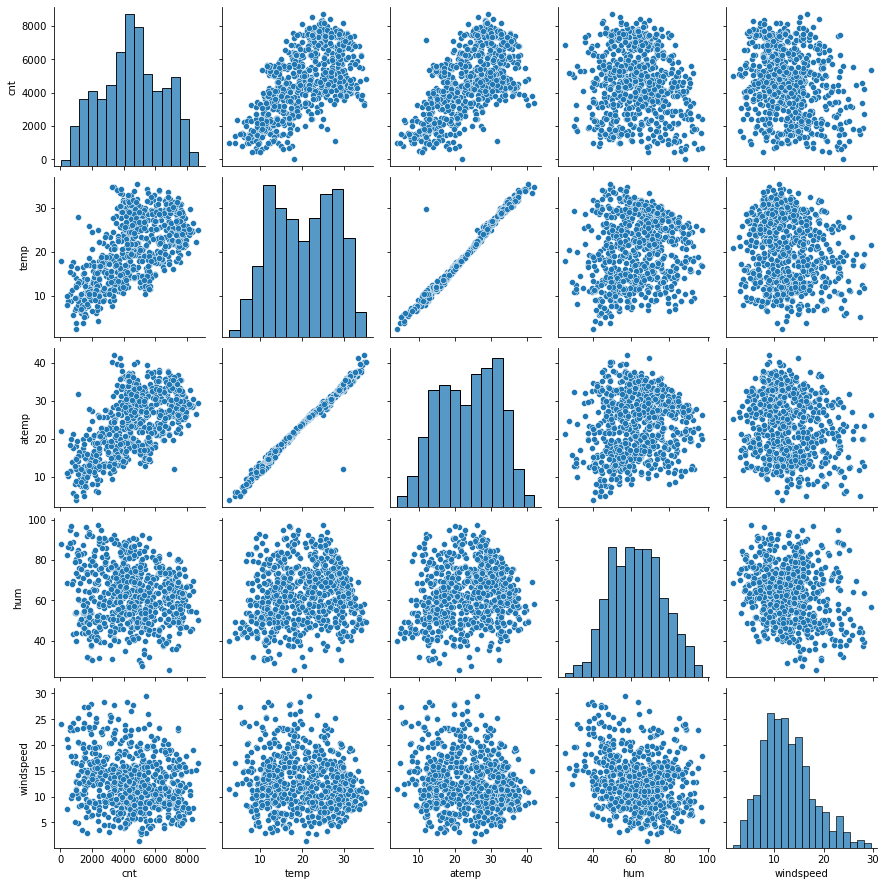

In [30]:
sns.pairplot(data = bike, vars = ['cnt','temp','atemp','hum','windspeed']);plt.show()

##### Inferences:
    - 1. CNT variable has strong positive correlation with temp and atemp variables.
    - 2. CNT has -ve correlation with humidity and windspeed which is obvious but the strength correlation is not great
    - 3. temp and atemp are strongly positively correlated with each other
    - 4. other correlations are present but their strenght is not great hence can be ignored.

##### 3. Numerical-Categorical

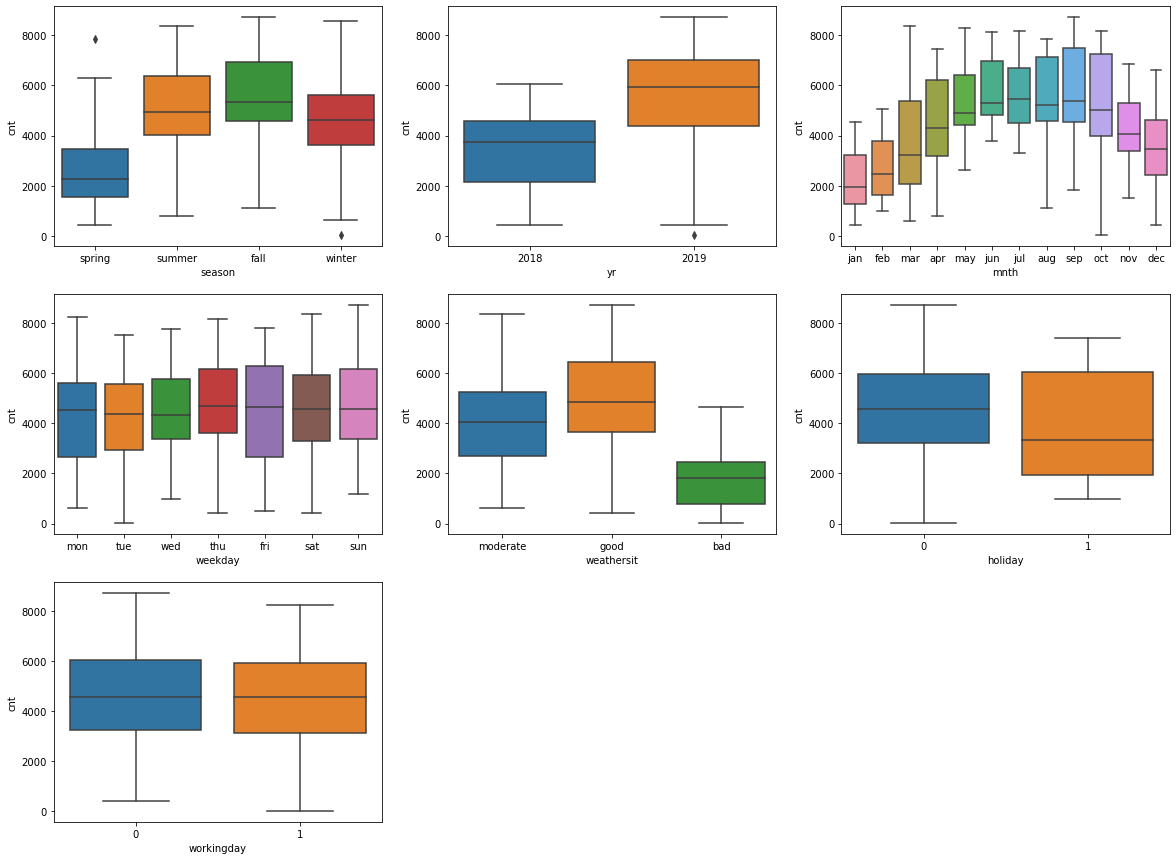

In [31]:
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

##### Inferences:
    - 1. Count of total rental bikes is more in Fall season & less in Spring
    - 2. Year by year rented bikes share is increasing.
    - 3. Rental bikes count is more during the mid of year.
    - 4. Bikes count is approximately same on every day and not depends on weekdays or weekends or holidays.
    - 5. When the rains or snow fall is worse or bad there is no bike sharing.

##### 3. Categorical-Categorical Analysis

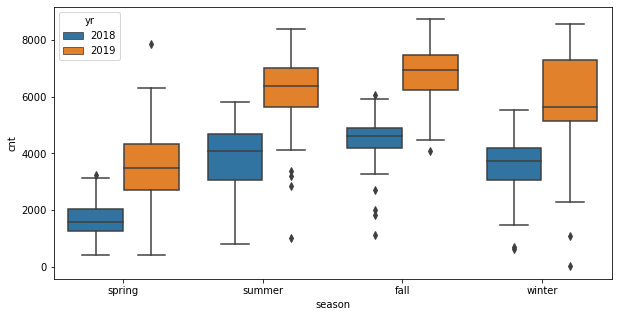

In [32]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'yr', data = bike)
plt.show()

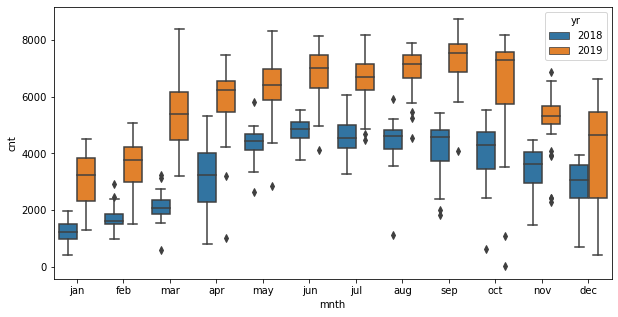

In [33]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'mnth', y = 'cnt', hue = 'yr', data = bike)
plt.show()

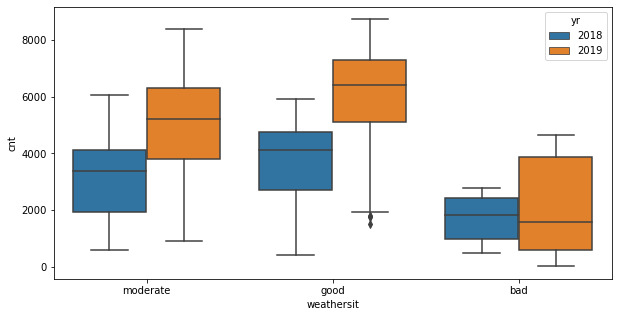

In [34]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'weathersit', y = 'cnt', hue = 'yr', data = bike)
plt.show()

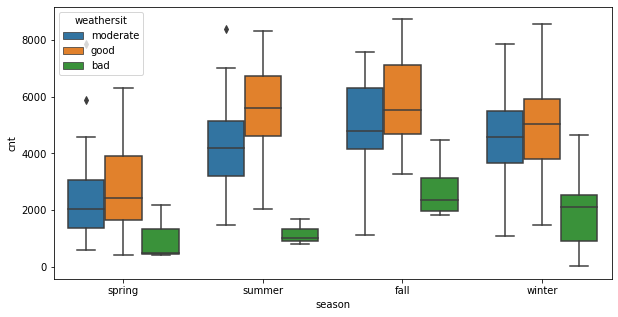

In [35]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'weathersit', data = bike)
plt.show()

## Linear Regression model:

### Data Preparation

In [36]:
# Check the housing dataframe 
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [37]:
# encoding year column back to what we had earlier
bike.yr.replace({'2018':0,'2019':1},inplace = True)
bike.head(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801


#### Dummy Variables

The categorical variables have many levels. We need to convert these levels into integers. 
For this, we will use something called `dummy variables`.

In [38]:
# Creating dummy variables and dropping first dummys to escape dummy variable trap
bike = pd.get_dummies(data=bike,columns=["season","mnth","weekday"],drop_first=True)
bike = pd.get_dummies(data=bike,columns=["weathersit"])
# In weathersit no need to drop any variable as sevre is already missing.

In [39]:
bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [40]:
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,1,0


#### Splitting the Data into Training and Testing Sets

In [41]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Rescaling the Features 

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler = MinMaxScaler()

In [44]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [45]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
728,1,0,1,0.245101,0.204242,0.319025,0.772556,0.204096,1,0,...,0,1,0,0,0,0,0,0,1,0
481,1,0,0,0.496388,0.499889,0.204176,0.764739,0.714565,0,1,...,0,0,1,0,0,0,0,0,1,0
113,0,0,1,0.651106,0.632534,0.774941,0.375373,0.479636,0,1,...,0,0,0,0,0,1,0,0,0,1
629,1,0,0,0.736253,0.711117,0.546404,0.604317,0.963300,0,0,...,1,0,0,1,0,0,0,0,1,0
535,1,0,1,0.901354,0.858965,0.470417,0.179101,0.712034,0,1,...,0,0,0,0,1,0,0,0,1,0


In [46]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,...,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,0.506876,0.031434,0.687623,0.537164,0.521667,0.529901,0.374965,0.512550,0.241650,0.245580,...,0.080550,0.145383,0.135560,0.147348,0.139489,0.143418,0.147348,0.031434,0.609037,0.359528
std,0.500445,0.174660,0.463919,0.226375,0.215665,0.199051,0.195571,0.224155,0.428505,0.430854,...,0.272411,0.352833,0.342657,0.354801,0.346797,0.350844,0.354801,0.174660,0.488446,0.480334
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.336479,0.328412,0.383410,0.230522,0.355844,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.533770,0.530326,0.527262,0.353572,0.516452,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.736253,0.703523,0.669954,0.487485,0.678900,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X and Y sets for the model building

In [47]:
y_train = df_train.pop('cnt')
X_train = df_train

### Building a linear model

Building linear regression model using the Linear Regression function and RFE utility from sklearn

#### RFE: Recursive feature elimination

In [48]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [49]:
# Running RFE with the output number of the variable equal to 15
lrm = LinearRegression()
lrm.fit(X_train, y_train)
rfe = RFE(lrm, n_features_to_select=15)             
rfe = rfe.fit(X_train, y_train)

In [50]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 12),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 9),
 ('season_winter', True, 1),
 ('mnth_aug', False, 14),
 ('mnth_dec', False, 2),
 ('mnth_feb', True, 1),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 10),
 ('mnth_mar', False, 8),
 ('mnth_may', False, 4),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 16),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 6),
 ('weekday_sat', False, 11),
 ('weekday_sun', False, 13),
 ('weekday_thu', False, 15),
 ('weekday_tue', False, 5),
 ('weekday_wed', False, 7),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', False, 3)]

In [51]:
col = X_train.columns[rfe.support_];col

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_nov',
       'mnth_sep', 'weathersit_bad', 'weathersit_good'],
      dtype='object')

In [52]:
X_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'mnth_aug', 'mnth_dec', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_oct', 'weekday_mon', 'weekday_sat',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed',
       'weathersit_moderate'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics

In [53]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [54]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [55]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [56]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.3
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          1.59e-188
Time:                        20:07:13   Log-Likelihood:                 514.04
No. Observations:                 509   AIC:                            -996.1
Df Residuals:                     493   BIC:                            -928.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2672      0.030     

In [57]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,55.47
3,temp,51.70
4,atemp,50.43
7,season_spring,3.63
5,hum,2.14
8,season_winter,2.12
10,mnth_jan,2.02
9,mnth_feb,1.78
15,weathersit_good,1.75
12,mnth_nov,1.48


In [58]:
# atemp has "both high VIF value and high p-value". So this can be eliminated first

In [59]:
# `atemp` is insignificant in presence of other variables; can be dropped
X_train_new = X_train_rfe.drop(['atemp'], axis = 1)

# Rebuilding the model without `atemp`

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.5
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          3.26e-189
Time:                        20:07:13   Log-Likelihood:                 512.94
No. Observations:                 509   AIC:                            -995.9
Df Residuals:                     494   BIC:                            -932.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2708      0.029     

In [60]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,55.07
6,season_spring,3.63
3,temp,3.27
4,hum,2.13
7,season_winter,2.11
9,mnth_jan,2.02
8,mnth_feb,1.78
14,weathersit_good,1.75
11,mnth_nov,1.48
10,mnth_jul,1.33


In [61]:
# `mnth_feb` is insignificant(p-value>0.05) in presence of other variables; can be dropped
X_train_new = X_train_new.drop(['mnth_feb'], axis = 1)

# Rebuilding the model without `mnth_feb`

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     205.6
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          6.14e-190
Time:                        20:07:13   Log-Likelihood:                 511.89
No. Observations:                 509   AIC:                            -995.8
Df Residuals:                     495   BIC:                            -936.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2648      0.029     

In [62]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,53.95
3,temp,3.22
6,season_spring,2.84
4,hum,2.13
7,season_winter,2.10
13,weathersit_good,1.74
8,mnth_jan,1.50
10,mnth_nov,1.48
9,mnth_jul,1.33
12,weathersit_bad,1.20


In [63]:
# `mnth_jan` is insignificant(p-value>0.05) in presence of other variables; can be dropped
X_train_new = X_train_new.drop(['mnth_jan'], axis = 1)

# Rebuilding the model without `mnth_jan`

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     221.8
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          1.49e-190
Time:                        20:07:13   Log-Likelihood:                 510.54
No. Observations:                 509   AIC:                            -995.1
Df Residuals:                     496   BIC:                            -940.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2593      0.029     

In [64]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,53.22
3,temp,3.09
6,season_spring,2.65
4,hum,2.13
7,season_winter,2.08
12,weathersit_good,1.74
9,mnth_nov,1.47
8,mnth_jul,1.32
11,weathersit_bad,1.20
5,windspeed,1.18


In [65]:
# `mnth_nov` is insignificant(p-value>0.05) in presence of other variables; can be dropped
X_train_new = X_train_new.drop(['mnth_nov'], axis = 1)

# Rebuilding the model without `mnth_nov`

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     241.1
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          3.22e-191
Time:                        20:07:13   Log-Likelihood:                 509.27
No. Observations:                 509   AIC:                            -994.5
Df Residuals:                     497   BIC:                            -943.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2546      0.029     

In [66]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,52.67
3,temp,3.03
6,season_spring,2.61
4,hum,2.12
7,season_winter,1.77
11,weathersit_good,1.74
8,mnth_jul,1.32
10,weathersit_bad,1.20
5,windspeed,1.18
9,mnth_sep,1.11


In [67]:
X_train_new = X_train_new.drop(['const'], axis=1)
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,15.28
3,hum,10.77
4,windspeed,4.21
10,weathersit_good,3.43
5,season_spring,2.53
0,yr,2.07
6,season_winter,2.02
7,mnth_jul,1.43
8,mnth_sep,1.21
9,weathersit_bad,1.21


In [68]:
# `hum` is insignificant(high VIF value) in presence of other variables; can be dropped
X_train_new = X_train_new.drop(['hum'], axis = 1)

# Rebuilding the model without `hum`

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     251.4
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          1.94e-187
Time:                        20:07:14   Log-Likelihood:                 497.46
No. Observations:                 509   AIC:                            -972.9
Df Residuals:                     498   BIC:                            -926.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1685      0.023     

In [69]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.64
3,windspeed,4.21
9,weathersit_good,2.68
0,yr,2.06
4,season_spring,1.70
5,season_winter,1.40
6,mnth_jul,1.36
7,mnth_sep,1.20
8,weathersit_bad,1.14
1,holiday,1.04


In [70]:
# `temp` is insignificant in presence of other variables; can be dropped
X_train_new1 = X_train_new.drop(['temp'], axis = 1)

# Rebuilding the model without `temp`

# Adding a constant variable 
X_train_lm1 = sm.add_constant(X_train_new1)

# Running the linear model
lm1 = sm.OLS(y_train,X_train_lm1).fit()   

#Let's see the summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     175.9
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          1.37e-148
Time:                        20:07:14   Log-Likelihood:                 402.98
No. Observations:                 509   AIC:                            -786.0
Df Residuals:                     499   BIC:                            -743.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4620      0.015     

In [71]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,2.92
8,weathersit_good,2.22
0,yr,1.82
3,season_spring,1.53
4,season_winter,1.40
5,mnth_jul,1.15
7,weathersit_bad,1.13
6,mnth_sep,1.08
1,holiday,1.04


In [72]:
# there is sudden decrease in R-squared when temp is dropped. So keep this variable. though VIF is>5

### Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [73]:
y_train_cnt = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

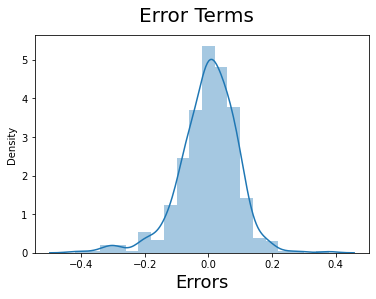

In [74]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

#### Applying the scaling on the test sets

In [75]:
num_vars = ['temp','atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [76]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.488584,0.022831,0.698630,0.560551,0.547691,0.503549,0.357948,0.527927,0.251142,0.269406,...,0.086758,0.136986,0.155251,0.132420,0.150685,0.146119,0.132420,0.018265,0.694064,0.287671
std,0.501015,0.149707,0.459904,0.232600,0.223886,0.182531,0.183809,0.217318,0.434663,0.444668,...,0.282125,0.344621,0.362974,0.339723,0.358561,0.354034,0.339723,0.134214,0.461858,0.453714
min,0.000000,0.000000,0.000000,0.046591,0.026455,0.070765,-0.049874,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.368668,0.368525,0.351877,0.232049,0.380177,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.564921,0.567477,0.499999,0.336405,0.530028,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.774153,0.742802,0.641153,0.450008,0.685918,0.500000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.019437,0.954151,0.951690,0.981707,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [77]:
y_test = df_test.pop('cnt')
X_test = df_test

In [78]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [79]:
# Making predictions using the fourth model

y_pred = lm.predict(X_test_new)

### Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

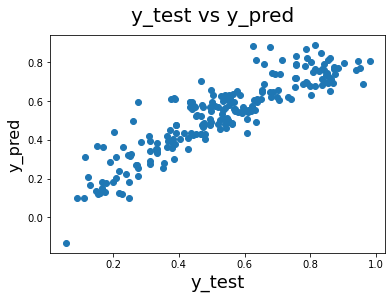

In [80]:
# Plotting y_test and y_pred to understand the spread. 
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

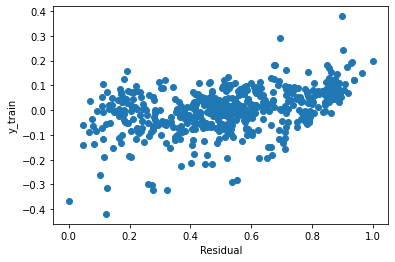

In [81]:
# scatter plot for the check - to validate Homoscedasticity
residual = (y_train - y_train_cnt)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

In [82]:
from scipy.stats import shapiro
shapiro(residual)

ShapiroResult(statistic=0.9552943110466003, pvalue=2.693764482308847e-11)

In [83]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7960967525888478

### Interpreting Results

In [84]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     251.4
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          1.94e-187
Time:                        20:07:15   Log-Likelihood:                 497.46
No. Observations:                 509   AIC:                            -972.9
Df Residuals:                     498   BIC:                            -926.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1685      0.023     


#### We can see that the equation of our best fitted line is:

$ cnt= 0.1685 + 0.2291 \times  yr + 0.4554  \times  temp + 0.0392 \times seasonwinter + 0.0624 \times mnthsep + 0.0773 \times weathersitgood -0.0707 \times holiday - 0.0961 \times windspeed - 0.1197 \times seasonspring - 0.0641 \times mnthjul - 0.2099 \times weathersitbad $


#### Inferences from EDA:
- Below are few inferences that we made after performing EDA on the dataset:
1.	Count of bikes shared (CNT) has strong positive correlation with temp and atemp variables.
2.	But temp and atemp are strongly positively correlated with each other. 
3.	CNT has -ve correlation with humidity and windspeed but the strength correlation is not great.
4.	Count of total rental bikes is more in Fall season & less in Spring
5.	Year by year rented bikes share is increasing.
6.	Rental bikes count is more during the mid of year but dip observed in July month.
7.	When the rains or snow fall is worse or severe bike sharing is very less.


- Lets check if these inferences are valid by comparing them with the model equation
1. Count of bikes shared (CNT) has strong positive correlation with temp and atemp variables.
    - Note: coeffiecient of temp variable is high as per equation. So the above inference is valid.
2. But temp and atemp are strongly positively correlated with each other. 
    - Note: temp and atemp leads to multicollienearity when they both present in model equaton. but only temp came over.
3. CNT has -ve correlation with humidity and windspeed but the strength correlation is not great.
    - Note: in equation humidity is not present but windspeed is there with -ve coefficient.
4. Count of total rental bikes is more in Fall season & less in Spring
    - Note: as per equation with increase in spring season bikes shared is getting decreased.
5. Year by year rented bikes share is increasing.
    - Note:  as per equation coeffiecient of yr variable is high. So the above inference is valid.
6. Rental bikes count is more during the mid of year but dip observed in July month.
    - Note:  as per equation mnth_jul has -ve coefficient.
7. When the rains or snow fall is worse or severe bike sharing is very less.
    - Note:  as per equation weathersit_bad has -ve coefficient.

"So all the inferences we made during EDA are valid and matching with  the regression model equation."

#### Interpreting Model Equation

As per the final model, the top 4 predictors that are significant in predicting the demand for shared bikes are:
-	Temperature (temp) - coefficient value ‘0.4554’
    -	This indicates that a unit increase in temp variable increases the bikes shared count by 0.4554 units.
-	Year (yr) - A coefficient value ‘0.2291’ 
    -	This indicates that a unit increase in yr variable increases the bikes shared count by 0.2291 units.
-	Weather Situation (weathersit_bad) - A coefficient value ‘-0.2099’ 
    -	This indicates that w.r.t weathersit_severe, a unit increase in weathersit_bad variable decreases the bikes shared count by 0.2099 units.
-	Season (season_spring) - A coefficient value of ‘0.1197’
    -	This indicates that w.r.t season_fall, a unit increase in season_spring variable decreases the bikes shared count by 0.1197 units.

#### Suggestions to Business:

- Business can consider temperature, year, weather, season as top 4 variables to predict bikes shared count.
- Demand increases every year. During the mid months when temperatures are high (or snow/rainfall is less or absent) the demand for the bikes will be very high.
- Though demand is high during the mid months, in July or when in the Spring seaon the demand sees a dip. Company can focus on this and plan a strategy to attract more bookings during July month and Spring.
- On holidays, demand is less. With discounts or any other strategy company can improve the bookings during holidays.